# Parte 1: Exploración

In [1]:
# Jesús Alejandro Pérez Granados
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv")

In [2]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [3]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


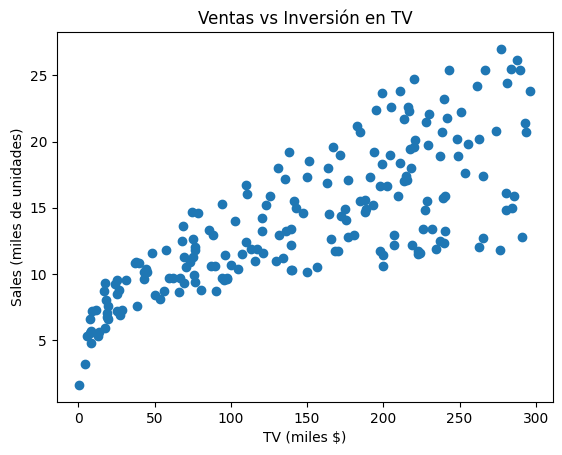

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV (miles $)')
plt.ylabel('Sales (miles de unidades)')
plt.title('Ventas vs Inversión en TV')
plt.show()

## Distribución de variables

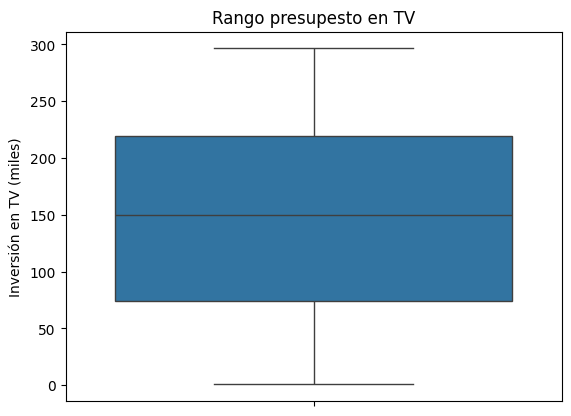

In [5]:
# Rango de TV
sns.boxplot(data=df, y = "TV")
plt.ylabel('Inversión en TV (miles)')
plt.title('Rango presupesto en TV')
plt.show()

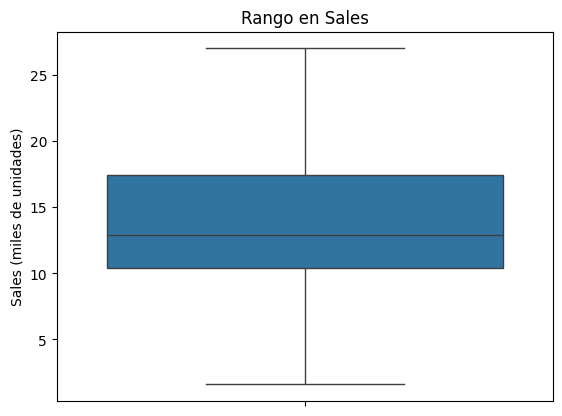

In [6]:
# Rango de Sales
sns.boxplot(data=df, y = "Sales")
plt.ylabel('Sales (miles de unidades)')
plt.title('Rango en Sales')
plt.show()

No aparenta haber outliers en el presupuesto en TV ni en las ventas totales. 
La correlación entre el presupusto en TV y las ventas es positivo; es decir, en promedio, entre más se invierte en TV más se vende, lo cual tiene sentido. Tiene una correlación de 0.78 lo que es bastante fuerte.
La relación en el scatter plot aparenta tener cierta tendencia lineal. Parece ser que mientras más se invierte más incierto es pues los puntos se alejan más con la misma inversión (varía mucho)

# Parte 2: Modelado
## 2A. Implementación desde cero con numpy

In [7]:
import numpy as np

# Extraer X y Y
X = df['TV'].values
Y = df['Sales'].values

# Calcular medias
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Calcular beta_1
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean)**2)
beta_1 = numerator / denominator

# Calcular beta_0
beta_0 = Y_mean - beta_1 * X_mean

print(f'beta_0 = {beta_0:.3f}')
print(f'beta_1 = {beta_1:.3f}')

beta_0 = 7.033
beta_1 = 0.048


Modelo: 
Sales=7.03+0.048×TV

## 2B. Implementación con scikit-learn 

In [8]:
from sklearn.linear_model import LinearRegression

# Preparar datos (scikit-learn necesita X en formato 2D)
X = df[['TV']]
y = df['Sales']

# Crear y ajustar modelo
model = LinearRegression()
model.fit(X, y)

# Ver coeficientes
print(f'Intercepto: {model.intercept_:.3f}')
print(f'Pendiente: {model.coef_[0]:.3f}')

# Hacer predicciones
y_pred = model.predict(X)

Intercepto: 7.033
Pendiente: 0.048


## 2C. Calcular métricas

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE y RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# R cuadrado
r2 = r2_score(y, y_pred)

print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

MSE: 10.513
RMSE: 3.242
R²: 0.612


# Parte 3: Visualización

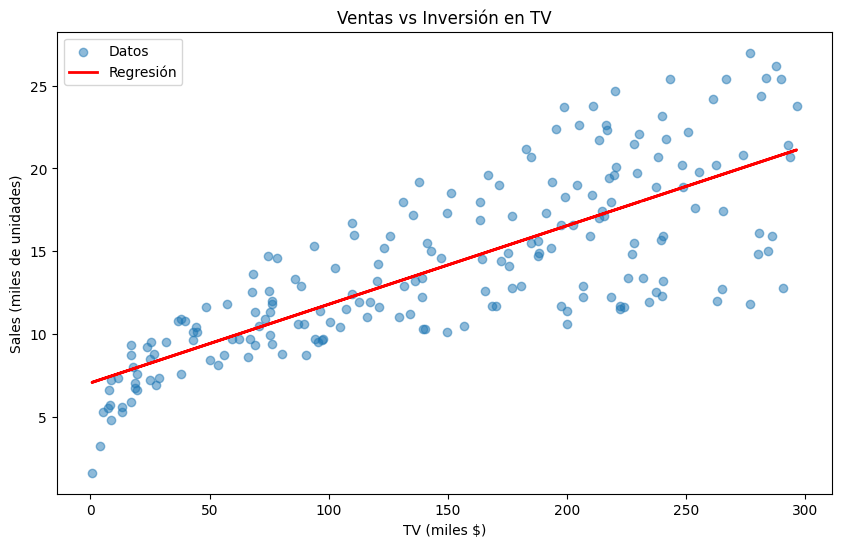

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Datos')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regresión')
plt.xlabel('TV (miles $)')
plt.ylabel('Sales (miles de unidades)')
plt.legend()
plt.title('Ventas vs Inversión en TV')
plt.show()

## Gráfico de residuos

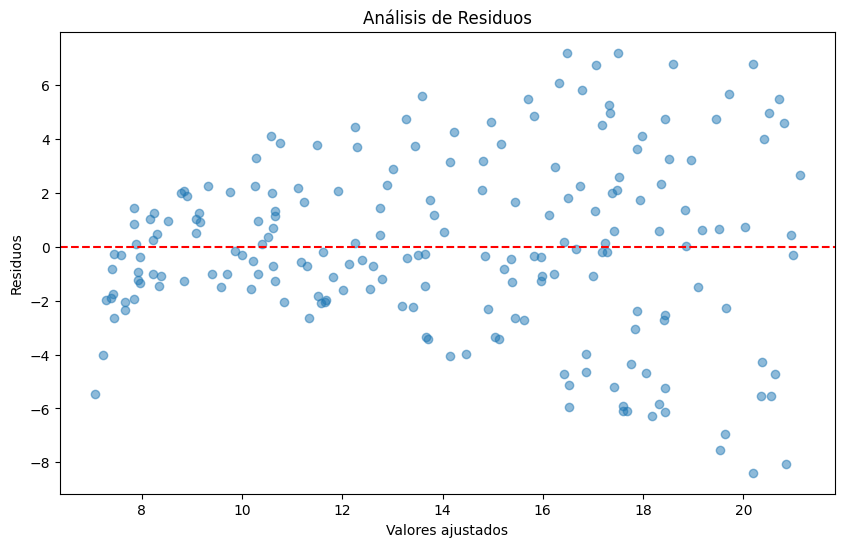

In [11]:
# Calcular residuos
residuals = y - y_pred

# Gráfico de residuos vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.show()

Su disperción crece, lo que indica cierta heterocedasticidad (cambios en la varianza).

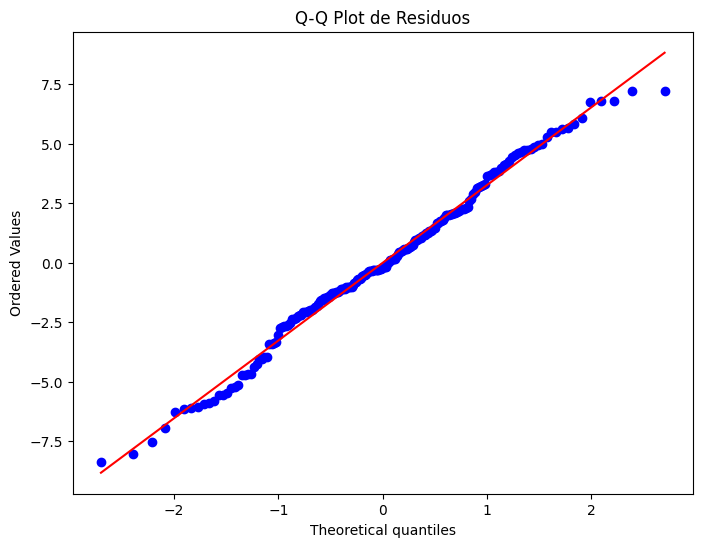

In [12]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()

# Parte 4: Interpretación
Sales=7.03+0.048×TV

**_¿Qué signfiica ß_0 = 7.03?_**

Esto es peligroso de interpretar, porque podemos interpretarlo como que las ventas base en promedio sin inversión en TV son 7,030, mas no es necesariamente cierto. Es verdadero que se puede tener ventas sin una inversión en TV, pero ß_0 es más como una constante del modelo desde el cual crece al invertir.

**_¿Qué signfiica ß_1 = 0.048?_**

Es, en promedio, cuánto crecen las ventas (en miles) por cada millar de dólares en presupuesto en TV. Como ya analizamos, la estimación de esto varía más mientras más se invierte, y es simplemente una asosiación, no una causa directa.

**_Si inviertes 100 mil dólares más en TV, cuántas ventas adicionales esperas?_**

Si se toma a *face value*, se puede decir que se esperan, en promedio, 4.8 miles de ventas adicionales. Sin embargo, se necesitaría más contexto para una estimación con mayor información (como la varianza de esta esperanza), pues no sabemos si la inversión que ya se tiene  es de 0, 100mil, 0 1 millón de dólares, por lo que sería irresponsable definirlo sin mencionar las posibles limitaciones.

**_R² = 0.61. ¿Es bueno o malo??_**

En temas de marketing, sí se considera bueno un R^2 de 0.61 en esta situación. Siendo publicidad, que el 61% de la variable se explique con otra, es bastante bueno considerando que en las situaciones reales existen múltiples otros factores que determinan ventas además de la publicidad.

**_¿Recomendarías invertir más en TV basándote solamente en este análisis?_**

Únicamente basado en el análisis, no recomendaría invertir más en TV para subir las ventas. Lo único que se puede asegurar de este análisis simple es una correlación entre los valores de las variables en estos datos. Sin embargo, podría ser que empresas con muchas ventas inviertan más dinero en televisión (porque lo tienen), lo cual daría una causalidad inversa. También podría ser coincidencia o que las empresas grandes en general ya invierten grandes cantidades de dinero. Sería necesario conocer el **contexto** real de estos datos. También podría ser útil algún indicador de cuándo empezaron con estas publicidades, pues quizá estratregias previas a estas son las que generaron las ventas. 